### Table of Contents
* [Project Description](#chapter)

* [Chapter 1: Open the data file and study the general information](#chapter1)
    * [Section 1.1: Open the Data File](#section_1_1)
    * [Section 1.2: Conclusion](#section_1_2)
      
 
* [Chapter 2: Prepare the data](#chapter2)
    * [Section 2.1: Convert the data to the necessary types](#section_2_1)
    * [Section 2.2: Find and eliminate errors in the data](#section_2_2)
    * [Section 2.3: The number of calls made and minutes used per month](#section_2_3)
    * [Section 2.4: The number of text messages sent per month](#section_2_4)
    * [Section 2.5: The volume of data per month](#section_2_5)
    * [Section 2.6: The monthly revenue from each user](#section_2_6)
    * [Section 2.7: Conclusion](#section_2_6)
    

* [Chapter 3: Analyze the data](#chapter3)
    * [Section 3.1: Describe the customers' behavior and yisualization by histogram](#section_3_1)
    * [Section 3.2: Conclusion.](#section_3_2)

    
* [Chapter 4:  Test the hypotheses](#chapter4)
    * [Section 4.1: The average revenue from users of Ultimate and Surf calling plans differs.](#section_4_1)
    * [Section 4.2: The average revenue from users in NY-NJ area is different from that of the users from other regions.](#section_4_2)
    * [Section 4.3: Conclusion.](#section_4_3)
    
    
* [Chapter 5: Conclusion](#chapter5)

### Chapter : Project description <a class="anchor" id="chapter"></a>


A telecom company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

A preliminary analysis of the plans based on a relatively small client selection. The data is provided on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The final goal is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

### Description of the plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

__Surf__

Monthly charge: $20

500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:

1. minute: 3 cents
2. text message: 3 cents
3. GB of data: $10

__Ultimate__

Monthly charge: $70

3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1. minute: 1 cent

2. text message: 1 cent

3. GB of data: $7

### Chapter 1: Open the data file and study the general information <a class="anchor" id="chapter1"></a>

#### Section 1.1: Open the data File <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from functools import reduce

The first step, we open all the data files and analyze the genernal information about the features and indicies.

In [2]:
try:
    data_calls=pd.read_csv('/datasets/megaline_calls.csv')
except:
    data_calls=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_3_Statistical_Data_Analysis\megaline_calls.csv")
data_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [3]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
#As describe in the data description that megaline round up seconds to minutes we will apply this as below.

#math.ceil(2.1)
data_calls['duration']=data_calls['duration'].apply(lambda x: math.ceil(float(x)))
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


There are total 13775 rows and 4 columns named as id, which represents the unique user identifier, user_id, the identifier of the user making the call. call_date and duration of the call. One thing will be noted, even the call duration is one second it will be counted as 1 minute and the 0 call duration represents the miss call by user. The duration of calls has also rounded up to next integer as description of the data that even call duration is i.e. 20 seconds it will be count as 1 minute. we have apply the ceil function and converted our dataset values.

Below we will check number of missed calls.

In [5]:
missed_calls=data_calls[data_calls['duration']==0].count()
missed_calls

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [6]:
missed_rows=data_calls[data_calls['duration']==0]

In [7]:
missed_calls/len(data_calls)*100

id           19.482339
user_id      19.482339
call_date    19.482339
duration     19.482339
dtype: float64

There are total 26834 no. of miss called which makes 19% of total data entries. We will visualize the duration columns by histogram and observe the behaviour of missed calls that how are the impacting out data set.

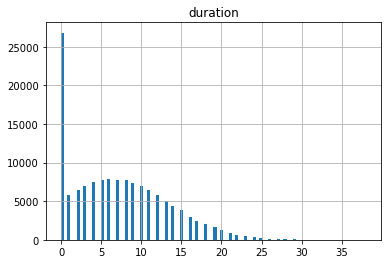

In [8]:
data_calls.hist('duration', bins=100);

In [9]:
#data_calls.drop(data_calls[data_calls.duration==0])
data_calls.drop(data_calls[data_calls['duration'] ==0 ].index, inplace = True) 

From the histogram the peak at 0 represents the missed calls and the observations tell that it will impact our data set as negative(skesness). We will delete these rows/outliers to avoid skewness.

In [10]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         110901 non-null  object
 1   user_id    110901 non-null  int64 
 2   call_date  110901 non-null  object
 3   duration   110901 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


We have deleted the call duration==0 entries ans will draw again to observe the data behaviour.

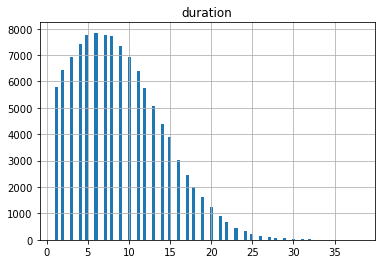

In [11]:
data_calls.hist('duration', bins=100);

Now it gives us a more clear picture of dataset. We can check that the normal call duration is 4-9 mintures.

Next we will load the second dataset and observe the it.

In [12]:
try:
    data_internet=pd.read_csv('/datasets/megaline_internet.csv')
except:
    data_internet=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_3_Statistical_Data_Analysis\megaline_internet.csv")
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [13]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [14]:
data_internet.isnull().values.any()

False

There are total 104825 data indicies and 4 no. of columns. The id and user_id are same as in calls, the session_date represents the day of surfing and mb_used represents how much total mbs have utilized by the customers. We also check for the nan values and found nothing so we can proceed with messages dataset. 

In [15]:
try:
    data_message=pd.read_csv('/datasets/megaline_messages.csv')
except:
    data_message=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_3_Statistical_Data_Analysis\megaline_messages.csv")
data_message.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [16]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
data_message.isnull().values.any()

False

There are total 76051 data indicies and 3 no. of columns. The id and user_id are same as in calls, the message_date represents the day of sending the message. We also check for the nan values and found nothing so we can proceed with data_plans dataset. 

In [18]:
try:
    data_plans=pd.read_csv('/datasets/megaline_plans.csv')
except:
    data_plans=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_3_Statistical_Data_Analysis\megaline_plans.csv")
data_plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data_plans dataset represents the two type of monthly plan by megaline which are surf and ultimate.

In [19]:
try:
    data_users=pd.read_csv('/datasets/megaline_users.csv')
except:
    data_users=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_3_Statistical_Data_Analysis\megaline_users.csv")
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [20]:
data_users.isnull().values.any()

True

In data_users dataset gives information of user_id, name of customers, age, city, the date of joining the company, the plan and if the customers is still subcribe the plan or left it. There are nan values in churn_date which represents the customer is still using the offer.

#### Section 1.2:  Conclusion <a class="anchor" id="section_1_1"></a>

In chapter 1, the all data files data_calls, data_users, data_minutes, data_internet, and data_plan is imported to the notebook. In data_calls as the megaline describe there are indicies with value 0 and these values represents the missed calls. We draw the histogram and observe the behavior of these values equal to zero. These were creating the skewness and we concluded them as outliers and remove missed calls values from data. After theat we round up the seconds values as megaline consider less than a minute values as a minutes. The next data_sets have no missing values or data_error so they are ready for further analysis.

### Chapter 2: Prepare the Data <a class="anchor" id="chapter2"></a>

#### Section 2.1: Convert the data to the necessary types<a class="anchor" id="section_2_1"></a>

The datasets columns, calls_date, session_date, and message_date were converted into date_time format and also added the month column for each dataset.

In [21]:
# we need to grouped data on user and months so first we will convert our data into pd.datetime
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"], format='%Y-%m-%d')
data_internet["session_date"] = pd.to_datetime(data_internet["session_date"], format='%Y-%m-%d')
data_message["message_date"] = pd.to_datetime(data_message["message_date"], format='%Y-%m-%d')
 
data_calls["month"] = pd.DatetimeIndex(data_calls["call_date"]).month
data_internet["month"] = pd.DatetimeIndex(data_internet["session_date"]).month
data_message["month"] = pd.DatetimeIndex(data_message["message_date"]).month
display(data_calls.head(), data_internet.head(), data_message.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


#### Section 2.2: Find and eliminate errors in the data<a class="anchor" id="section_2_2"></a>


We have already remove the errors in chapter 1, as the missed calls and the sec-to-min conversions. The conversion of mbs-to-gbs has also applied in section 2.4

#### Section 2.3: The number of calls made and minutes used per month<a class="anchor" id="section_2_3"></a>

#### Section 2.4: The number of text messages sent per month.<a class="anchor" id="section_2_4"></a>

#### Section 2.5: The volume of data per month.<a class="anchor" id="section_2_5"></a>

After adding the month column in each dataset, it would be easy for us to calculate no. of calls, messages and mbs for each customers in a month. We will grouped all three datasets.

In [22]:
grouped_calls = data_calls.groupby(["user_id", 'month']).agg({'duration': ['sum'], 'call_date': ['count']})
grouped_internet = data_internet.groupby(["user_id", "month"]).agg({'mb_used': ['sum']})
grouped_messages = data_message.groupby(["user_id", "month"]).agg({'message_date': ['count']})

We havee grouped the calls, internet and messages data by user_id which will provide combines list of all months for each user_id. In the durationand mbs we applied aggfunc=sum, and for texts the count was applied.   After grouping the data now three datasets will be merged togather.

In [23]:
data_frames = [grouped_calls, grouped_internet, grouped_messages]
data_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],how='outer'), data_frames).fillna(0).reset_index()
data_merged.head()

,user_id,month,duration,call_date,mb_used,message_date
,,,sum,count,sum,count
0,1000,12,124.0,16.0,1901.47,11.0
1,1001,8,182.0,22.0,6919.15,30.0
2,1001,9,315.0,38.0,13314.82,44.0
3,1001,10,393.0,47.0,22330.49,53.0
4,1001,11,426.0,49.0,18504.30,36.0


In [24]:
data_merged.columns = data_merged.columns.droplevel(-1)
data_merged.head()

,user_id,month,duration,call_date,mb_used,message_date
0,1000,12,124.0,16.0,1901.47,11.0
1,1001,8,182.0,22.0,6919.15,30.0
2,1001,9,315.0,38.0,13314.82,44.0
3,1001,10,393.0,47.0,22330.49,53.0
4,1001,11,426.0,49.0,18504.30,36.0


In [25]:
data_column=[data_merged,data_users]
data_combine=reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],how='outer'), data_column).fillna(0)
df=data_combine
#df = data_combine.drop('user_id', 1)

df['gb_used']=df['mb_used']/1024
df['gb_used']=df['gb_used'].apply(lambda x: math.ceil(float(x)))
#data_internet[data_internet['gb_used']>2]
df.head()

,user_id,month,duration,call_date,mb_used,message_date,first_name,last_name,age,city,reg_date,plan,churn_date,gb_used
0,1000,12.0,124.0,16.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,2
1,1001,8.0,182.0,22.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,7
2,1001,9.0,315.0,38.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,14
3,1001,10.0,393.0,47.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,22
4,1001,11.0,426.0,49.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,19


The above merged dataset is now has arange the user_ids and providing sum of duration of calls , total call made in on month, total mb_used in specific month and messages sent in that month. 

__For Example__

For the 12 month the user_id 1000 has made 16 calls of 116.83 minutes, 1901.47 mbs and sent 11 messages. 

It also describe the customer plan. We will find the answer pf below question.



#### Section 2.6: The monthly revenue from each user<a class="anchor" id="section_2_6"></a>

__The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)__

To calculate the monthly revenue from each user, the dataset will in divided into two parts as for each plan (surf, ultimate). First a fucntion was developed and applied to the overvall dataset which has provided the revenue from each users, depending upon the plan and if the user exceeded the limit it was also added into revenue.

In [26]:
df.head(2)

,user_id,month,duration,call_date,mb_used,message_date,first_name,last_name,age,city,reg_date,plan,churn_date,gb_used
0,1000,12.0,124.0,16.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,2
1,1001,8.0,182.0,22.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,7


In [27]:
plan=df['plan'].values[0]
plan

'ultimate'

In [28]:
df.head(2)

,user_id,month,duration,call_date,mb_used,message_date,first_name,last_name,age,city,reg_date,plan,churn_date,gb_used
0,1000,12.0,124.0,16.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,2
1,1001,8.0,182.0,22.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,7


In [29]:
def total_revenue(df):
    plan = df['plan']   
    internet_usage = df['gb_used']
    monthly_minutes  = df['duration']
    messages = df['message_date']
 
    if plan == 'surf':
        
        if monthly_minutes >= 500:
            revenue_calls = (0.03)*(monthly_minutes - 500) 
        else:
             revenue_calls = 0
        if messages >= 50:
            revenue_messages = 0.03*(messages - 50)
        else :
            revenue_messages = 0
        if internet_usage >= 15:
            revenue_internet_usage = 10*(internet_usage - 15)
        else :
            revenue_internet_usage = 0
 
        cost = 20 + revenue_messages + revenue_internet_usage + revenue_calls
 
 
 
    elif plan == 'ultimate':
 
        if monthly_minutes >= 3000:
            revenue_calls = (0.01)*(monthly_minutes - 3000) 
        else:
            revenue_calls = 0
        if messages >= 50:
            revenue_messages = 0.01*(messages - 1000)
        else :
            revenue_messages = 0
        if internet_usage >= 15:
            revenue_internet_usage = 7*(internet_usage - 30)
        else :
            revenue_internet_usage = 0
 
        cost = 70 + revenue_messages + revenue_internet_usage + revenue_calls
 
    return cost
 
df['total_cost'] = df.apply(total_revenue , axis = 1)
df.head()

,user_id,month,duration,call_date,mb_used,message_date,first_name,last_name,age,city,reg_date,plan,churn_date,gb_used,total_cost
0,1000,12.0,124.0,16.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,2,70.00
1,1001,8.0,182.0,22.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,7,20.00
2,1001,9.0,315.0,38.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,14,20.00
3,1001,10.0,393.0,47.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,22,90.09
4,1001,11.0,426.0,49.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,19,60.00


The total cost has added and to the dataset. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2303 non-null   int64  
 1   month         2303 non-null   float64
 2   duration      2303 non-null   float64
 3   call_date     2303 non-null   float64
 4   mb_used       2303 non-null   float64
 5   message_date  2303 non-null   float64
 6   first_name    2303 non-null   object 
 7   last_name     2303 non-null   object 
 8   age           2303 non-null   int64  
 9   city          2303 non-null   object 
 10  reg_date      2303 non-null   object 
 11  plan          2303 non-null   object 
 12  churn_date    2303 non-null   object 
 13  gb_used       2303 non-null   int64  
 14  total_cost    2303 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 287.9+ KB


#### Section 2.7: Conclusion.<a class="anchor" id="section_2_7"></a>

In chapter 2, First we converted the datasets columns date to the date_time format and after added the month columns in each df, We already removed the missed calls and rounded up sec to min values in chapter 1. After that mbs were converted to the gbs in gb_used column. To find answer the number of calls, mbs and texts the corresponding dataset was grouped and by application of the aggfunc of sum and count we calculated the values. Then all three datasets were merged which gave us the total calls, mb, and texts values for each customers. To calculate the revenue from each user, we divided the df into two parts basis on plan and write a function which calculate revenue for users depending upon the plan of customers. After applying the function on our dataset we have a total_cost df which provides the revenue from each customers depending upon the plan and overcharging if the customer overused the services. 

### Chapter 3: Analyze the data <a class="anchor" id="chapter3"></a>

#### Section 3.1: Describe the customers' behavior and yisualization by histogram.<a class="anchor" id="section_3_1"></a>
 

__Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.__

First we will extract the require information regarding call, messages and data usage from our final dataset'df'. We will use describe method to find mean, dispersion, and standard deviation. And plot histogram.

In [31]:
df.describe()

,user_id,month,duration,call_date,mb_used,message_date,age,gb_used,total_cost
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,9.132870,427.419453,48.155015,16691.603869,33.022579,45.420756,16.797221,49.804516
std,143.044136,2.562964,237.490294,26.338649,8026.001447,34.065907,16.774962,7.857946,54.552534
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-44.460000
25%,1122.000000,8.000000,262.500000,30.000000,12185.215000,3.000000,30.000000,12.000000,20.000000
50%,1245.000000,10.000000,424.000000,48.000000,16803.260000,25.000000,46.000000,17.000000,40.000000
75%,1368.000000,11.000000,571.500000,64.000000,20993.075000,51.000000,61.000000,21.000000,70.000000
max,1499.000000,12.000000,1510.000000,167.000000,70931.590000,266.000000,75.000000,70.000000,590.370000


The describe function has given the mean, dispersion and standrd deviation of data. There are total 2303 rows of data. The mean give us the overall mean of column but we will calculate mean of texts, volume of data and texts for each individual user below. The standard deviation of each column and 25%(Q1), 50%(Q2) 75%(Q3) IQR values describing that data has normal distribution. 

__Find the minutes, texts, and volume of data the users of each plan require per month.__

In [32]:
df1 = df[['user_id', 'duration', 'gb_used','message_date','plan']].groupby('user_id').mean().round(2).reset_index()
df1.head()

,user_id,duration,gb_used,message_date
0,1000,124.00,2.00,11.00
1,1001,345.60,16.20,41.40
2,1002,276.33,13.67,29.33
3,1003,1104.00,27.00,50.00
4,1004,346.50,19.62,22.12


In the above block of code, we have grouped the data columns duration, gb_used and messages with user_id. After that we find the mean of the data columns. We has given us the average duration( average minutes), average gb_used and average texts messages required for the each customers.

In [33]:
table = pd.pivot_table(df, values=['duration','message_date', 'gb_used','total_cost'], index=['user_id', 'plan'],
                    aggfunc={'duration': np.mean,
                             'message_date': np.mean,
                             'total_cost':np.mean,
                            'gb_used':np.mean}).reset_index().round(2)
table.head()

,user_id,plan,duration,gb_used,message_date,total_cost
0,1000,ultimate,124.00,2.00,11.00,70.00
1,1001,surf,345.60,16.20,41.40,50.02
2,1002,surf,276.33,13.67,29.33,33.33
3,1003,surf,1104.00,27.00,50.00,158.12
4,1004,surf,346.50,19.62,22.12,76.25


The table describe the average usage of calls, duration, messages, gb and cost for each customers.

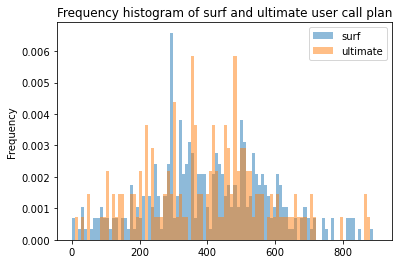

In [34]:
#https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

x1 = table.loc[table.plan=='surf', 'duration']
x2 = table.loc[table.plan=='ultimate', 'duration']

kwargs = dict(alpha=0.5, bins=100, range=(1,900), density=True)

plt.hist(x1, **kwargs, label='surf')
plt.hist(x2, **kwargs, label='ultimate')

plt.gca().set(title='Frequency histogram of surf and ultimate user call plan', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

The above histogram visualize the call duration for the plans surf and ulitmate. The range arguments was applied to remove the outliers as without range fucntion the values were not equally distributed.  Now both have a normal distribution.

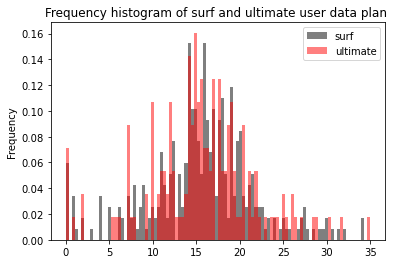

In [35]:
x3 = table.loc[table.plan=='surf', 'gb_used']
x4 = table.loc[table.plan=='ultimate', 'gb_used']

kwargs = dict(alpha=0.5, bins=100, range=(0,35),density=True)

plt.hist(x3, **kwargs,color='black', label='surf')
plt.hist(x4, **kwargs,color='red', label='ultimate')

plt.gca().set(title='Frequency histogram of surf and ultimate user data plan ', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

The above histogram visualize the call data usage for the plans surf and ulitmate. The range arguments was applied to remove the outliers as without range fucntion the values were not equally distributed. Now both have a normal distribution. It is informative that some customers dont really have use the data as there is a small peak at x-label 1. 

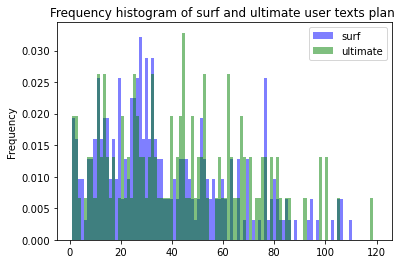

In [36]:
x5 = table.loc[table.plan=='surf', 'message_date']
x6 = table.loc[table.plan=='ultimate', 'message_date']

kwargs = dict(alpha=0.5, bins=100, range=(1,120),density=True)

plt.hist(x5, **kwargs,color='b', label='surf')
plt.hist(x6, **kwargs,color='green', label='ultimate')

plt.gca().set(title='Frequency histogram of surf and ultimate user texts plan ', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

The above histogram visualize the text usage for the plans surf and ulitmate. The range arguments was applied to remove the outliers as without range fucntion the values were not equally distributed. Now both have a normal distribution.

#### Section 3.2: Conclusion.<a class="anchor" id="section_3_2"></a>

In chapter 3, to find the minutes, texts and volume a customer required, the data columns duration, gb_used, texts, plan were added into another dataframe and grouped them by columns user_id and plan. The mean  was calculted the to get average usage for each customers. After that the histograms were plotted to visualize the relation between the users of both plans.

### Chapter 4: Test the hypotheses <a class="anchor" id="chapter4"></a>

#### Section 4.1: The average revenue from users of Ultimate and Surf calling plans differs.<a class="anchor" id="section_4_1"></a>

__Criterion to test the hypotheses and why?__

Firstly, We decided to apply the Mann-Whitney U Test. We have two different sets of data as ultimate users and surf users. IN Mann-Whitney U test the two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are randomly mixed in the rank ordering or if they are clustered at opposite ends when combined.  random rank order would mean that the two samples are not different, while a cluster of one sample values would indicate a difference between them. In simple words, it observe the datasets distribution if the distribution is same the tests approved our assumtion otherwise we reject our assumption.

__formulation of the null and alternative hypotheses__

As the default assumption or null hypothesis is that there is no revenue difference between the distributions of the ultimate and surf plan users. Rejection of this hypothesis suggests that there is likely some difference between the reveneue of users. 

__Fail to Reject H0:__ Sample distributions are equal/Revenue is same.

__Reject H0:__ Sample distributions are not equal/Revenue is not same.





The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [37]:
surf_user = table.loc[table.plan=='surf', 'total_cost'].reset_index()
ultimate_user = table.loc[table.plan=='ultimate', 'total_cost'].reset_index()
from scipy.stats import mannwhitneyu
stat, p =mannwhitneyu(surf_user['total_cost'],ultimate_user['total_cost'])
alpha=0.05
if p >alpha:
    print('the surf and ultimate plan has Same Revenue')
else:
    print('The surf and ultimate plan has different revenue "Reject H0"')

#surf_user.head(2), ultimate_user.head(2)

The surf and ultimate plan has different revenue "Reject H0"


#### Section 4.2: The average revenue from users in NY-NJ area is different from that of the users from other regions.<a class="anchor" id="section_4_2"></a>

To answer the question, first we will find the dataset city column uniques values.

In [38]:
df['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [39]:
region_ny_nj=df[df['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
revenue_ny_nj=region_ny_nj[['city','total_cost']]
revenue_ny_nj.head(2)

,city,total_cost
56,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00
57,"New York-Newark-Jersey City, NY-NJ-PA MSA",38.84


In [40]:
region_other=df[df['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']
revenue_other=region_other[['city','total_cost']]
revenue_other.head(2)

,city,total_cost
0,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,"Seattle-Tacoma-Bellevue, WA MSA",20.0


We have divided our dataset into two dfs, one for NY_NJ cities and second for the other regions. 

We have applied the Mann Whiteney U test as in first part the assumption and the H0 hypothsis concluded also same way.


__formulation of the null and alternative hypotheses__

As the default assumption or null hypothesis is that there is no revenue difference between the distributions of the both regions. Rejection of this hypothesis suggests that there is likely some difference between the reveneue of regions. 

__Fail to Reject H0:__ Regions distributions are equal/Revenue is same.

__Reject H0:__ Regions distributions are not equal/Revenue is not same.


In [41]:
'''surf_user = table.loc[table.plan=='surf', 'total_cost'].reset_index()
ultimate_user = table.loc[table.plan=='ultimate', 'total_cost'].reset_index()'''
from scipy.stats import mannwhitneyu
stat, p =mannwhitneyu(revenue_ny_nj['total_cost'],revenue_other['total_cost'])
alpha=0.05
if p >alpha:
    print('The region NY-NJ and other region have Same Revenue "Verify H0"')
else:
    print('The region NY-NJ and other region have  different revenue "Reject H0"')

#surf_user.head(2), ultimate_user.head(2)

The region NY-NJ and other region have  different revenue "Reject H0"


#### Section 4.3: Conclusion.<a class="anchor" id="section_4_3"></a>

In chapter 4, We tested the hypothsis for revenue. The base was two differnent dataset of the origional dataset. We applied Mann-Whitney U tests which observe the distribution of both dfs if the distribution is same it verify the H0 hypothsis otherwise reject it. In both the tests we assume that the H0= Same revenue. The results rejected our H0 and we can conclude that both plans(surf, ultimate) and regions(NY-NJ and Other) have different revenues. 

### Chapter 5: Conclusion <a class="anchor" id="chapter5"></a>

In chapter 1, the all data files data_calls, data_users, data_minutes, data_internet, and data_plan is imported to the notebook. In data_calls as the megaline describe there are indicies with value 0 and these values represents the missed calls. We draw the histogram and observe the behavior of these values equal to zero. These were creating the skewness and we concluded them as outliers and remove missed calls values from data. After theat we round up the seconds values as megaline consider less than a minute values as a minutes. The next data_sets have no missing values or data_error so they are ready for further analysis.

In chapter 2, First we converted the datasets columns date to the date_time format and after added the month columns in each df, We already removed the missed calls and rounded up sec to min values in chapter 1. After that mbs were converted to the gbs in gb_used column. To find answer the number of calls, mbs and texts the corresponding dataset was grouped and by application of the aggfunc of sum and count we calculated the values. Then all three datasets were merged which gave us the total calls, mb, and texts values for each customers. To calculate the revenue from each user, we divided the df into two parts basis on plan and write a function which calculate revenue for users depending upon the plan of customers. After applying the function on our dataset we have a total_cost df which provides the revenue from each customers depending upon the plan and overcharging if the customer overused the services.

In chapter 3, to find the minutes, texts and volume a customer required, the data columns duration, gb_used, texts, plan were added into another dataframe and grouped them by columns user_id and plan. The mean was calculted the to get average usage for each customers. After that the histograms were plotted to visualize the relation between the users of both plans.

In chapter 4, We tested the hypothsis for revenue. The base was two differnent dataset of the origional dataset. We applied Mann-Whitney U tests which observe the distribution of both dfs if the distribution is same it verify the H0 hypothsis otherwise reject it. In both the tests we assume that the H0= Same revenue. The results rejected our H0 and we can conclude that both plans(surf, ultimate) and regions(NY-NJ and Other) have different revenues.